In [1]:
#Load the u.data file into a dataframe
import pandas as pd
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('/Users/youssefeldeeb/Documents/Material/Recommendation-Systems/Datasets/movielens/u.data', sep='\t', names=r_cols, encoding='latin-1')

ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [2]:
# import pandas as pd
# import numpy as np

# df = pd.read_csv('foods last.csv')
# df.head()

,index,name,time,no_of_ppl,prep_time,calories,main_component,ingredients,prep,img_link
0,0,شيش طاووق,غداء,6,40,186.00,دجاج,500 جم دجاج مخلي مقطع مكعبات ويفضل الأور...,تبلي قطع ومكعبات الدجاج بالتتبيلة بعد ما...,https://www.supermama.me/system/App/Entities/R...
1,1,مكرونة بالدجاج والمشروم,غداء,4,30,867.00,مكرونة,250 جم مكرونة بالشكل الذي تفضلينه ...,اسلقي المكرونة، وأضيفي بعض الملح وملعقة...,https://www.supermama.me/system/App/Entities/R...
2,2,اللازانيا,غداء,4,30,427.10,مكرونة,"2 ملعقة كبيرة زيت , خضروات , 100 جم بص...","سخني الفرن. , سخني الزيت في إناء يصل...",https://www.supermama.me/system/App/Entities/R...
3,3,المكرونة بالبشاميل,غداء,8,60,379.81,مكرونة,"500 جم مكرونة مقصوصة , 30 جم دقيق , 1000...","في إناء على النار، سخني السمن جيدًا. , ...",https://www.supermama.me/system/App/Entities/R...
4,4,أرز بالكبد والقوانص,غداء,4,40,624.00,كبد و قوانص,"500 جم كبد وقوانص , 300 جم أرز , 2...",ضعي الزبد على النار، ثم أضيفي البصل وشوح...,https://www.supermama.me/system/App/Entities/R...


In [3]:
#Drop the timestamp column
ratings = ratings.drop('timestamp', axis=1)
ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [4]:
print(ratings.shape)
print(df.shape)

(100000, 3)
(488, 10)


In [5]:
ratings.rename(columns = {'movie_id':'meal_id'}, inplace = True)
ratings.head(10)

,user_id,meal_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [6]:
ratings[['rating']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,100000.0,3.52986,1.125674,1.0,3.0,4.0,4.0,5.0


/Users/youssefeldeeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/youssefeldeeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


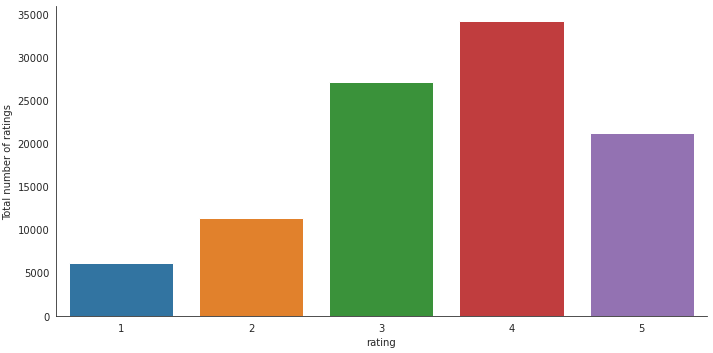

In [7]:
# Check the distribution of ratings 
import seaborn as sns

with sns.axes_style('white'):
    g = sns.factorplot("rating", data=ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

In [8]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', ratings['user_id'].nunique())
print('Number of unique FOODS in Raw data = ', ratings['meal_id'].nunique())


Number of unique USERS in Raw data =  943
Number of unique FOODS in Raw data =  1682


In [9]:
ratings = ratings.sort_values('user_id')
ratings.head()

,user_id,meal_id,rating
66567,1,55,5
62820,1,203,4
10207,1,183,5
9971,1,150,5
22496,1,68,4


In [10]:
# Top 10 users based on rating
most_rated = ratings.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
dtype: int64

In [11]:
#Training and test data
from sklearn.model_selection import train_test_split

#Assign X as the original ratings dataframe and y as the user_id column of ratings.
x = ratings.copy()
y = ratings['user_id']

#Split into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)


In [12]:
#Evaluation
from sklearn.metrics import mean_squared_error

#Function that computes the root mean squared error (or RMSE)
import numpy as np
def rmse (y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#Define the baseline model to always return 3.
def baseline(user_id, movie_id):
    return 3.0

In [13]:
#Function to compute the RMSE score obtained on the testing set by a model
def score(cf_model):
    #Construct a list of user-meal tuples from the testing dataset
    id_pairs = zip(x_test['user_id'],x_test['meal_id'])
    
    #Predict the rating for every user-meal tuple
    y_pred = np.array([cf_model(user, movie) for user,movie in id_pairs])
    
    #Extract the actual ratings given by the users in the test data
    y_true = np.array(x_test['rating'])
    
    #Return the final RMSE score
    return rmse(y_pred,y_true)

In [17]:
#Build the ratings matrix using pivot_table function
r_matrix = x_train.pivot_table(values='rating', index='user_id', columns='meal_id')
r_matrix.head()

meal_id,1,2,3,4,5,6,7,8,9,10,...,1672,1673,1674,1675,1676,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,NaN,NaN,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#User Based Collaborative Filter using Mean Ratings
def cf_user_mean(user_id, movies_id):
    #Check if meal_id exists in r_matrix
    if movies_id in r_matrix:
        #Compute the mean of all the ratings given to the meal
        mean_rating = r_matrix[movies_id].mean()
    else:
        #Default to a rating of 3.0 in the absence of any information
        mean_rating = 3
    return mean_rating

#Compute RMSE for the Mean model
score(cf_user_mean)

1.0234701463131335

In [33]:
#Create a dummy ratings matrix with all null values imputed to 0
r_matrix_dummy = r_matrix.copy().fillna(0)

# Import cosine_score
from sklearn.metrics.pairwise import cosine_similarity

#Compute the cosine similarity matrix using the dummy ratings matrix
cosin_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)

#Convert into pandas dataframe
cosin_sim = pd.DataFrame(cosin_sim, index=r_matrix.index, columns=r_matrix.index)

# r_matrix_dummy.head()
cosin_sim.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.118076,0.029097,0.011628,0.264677,0.312419,0.308729,0.224269,0.026017,0.286411,...,0.308475,0.055872,0.197862,0.131367,0.152449,0.084456,0.293293,0.056765,0.103536,0.326491
2,0.118076,1.000000,0.099097,0.107680,0.034279,0.152789,0.086705,0.078864,0.068940,0.092399,...,0.086927,0.259636,0.289092,0.318824,0.149105,0.186347,0.168034,0.106748,0.136796,0.080358
3,0.029097,0.099097,1.000000,0.252131,0.026893,0.062539,0.039767,0.089474,0.078162,0.037670,...,0.040918,0.019031,0.065417,0.055373,0.086503,0.018418,0.096993,0.109631,0.092574,0.018987
4,0.011628,0.107680,0.252131,1.000000,0.000000,0.045543,0.078812,0.095354,0.059498,0.053879,...,0.024226,0.050703,0.056561,0.107294,0.098892,0.000000,0.132900,0.142798,0.097066,0.015176
5,0.264677,0.034279,0.026893,0.000000,1.000000,0.202843,0.299619,0.163724,0.038474,0.153021,...,0.262547,0.048524,0.048312,0.022202,0.091910,0.066000,0.156172,0.115842,0.124297,0.267574


In [38]:
#User Based Collaborative Filter using Weighted Mean Ratings
def cf_user_wmean(user_id, food_id):
    #Check if meal_id exists in r_matrix
    if food_id in r_matrix:
        #Get the similarity scores for the user in question with every other user
        sim_scores = cosin_sim[user_id]

        #Get the user ratings for the meal in question
        m_ratings = r_matrix[food_id]

        #Extract the indices containing NaN in the m_ratings series
        idx = m_ratings[m_ratings.isnull()].index

        #Drop the NaN values from the m_ratings Series
        m_ratings = m_ratings.dropna()

        #Drop the corresponding cosine scores from the sim_scores series
        sim_scores = sim_scores.drop(idx)

        #Compute the final weighted mean
        wmean_rating = np.dot(sim_scores, m_ratings)/sim_scores.sum()
    else:
        #Default to a rating of 3.0 in the absence of any information
        wmean_rating = 3.0
    return wmean_rating

score(cf_user_wmean)   

1.0174483808407588

In [36]:
cf_user_wmean(55,2)

3.2365239126318652